# BENGALURU HOUSE PRICE PREDICTION

1.0.1 Buying a home,especialy in a city like bengaluru is a tricky choice.While the major factors are same for all the metrocities,there are others to be considered for the silicon valley of India.With its help crowd,vibrant culture,great climate and a slew of job oppurtunities its difficult to ascertain the price of a housein bengaluru.

## 1.1 IMPORTING LIBRARIES

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
df=pd.read_csv('/content/Bengaluru_House_Data.csv')
df

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


In [ ]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [ ]:
df.tail()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.0
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.0
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.0
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.0
13319,Super built-up Area,Ready To Move,Doddathoguru,1 BHK,NaN,550,1.0,1.0,17.0


In [ ]:
df.drop_duplicates()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13314,Super built-up Area,Ready To Move,Green Glen Layout,3 BHK,SoosePr,1715,3.0,3.0,112.00
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00


In [ ]:
df.isna().sum()

,0
area_type,0
availability,0
location,1
size,16
society,5502
total_sqft,0
bath,73
balcony,609
price,0


In [ ]:
df.dtypes

,0
area_type,object
availability,object
location,object
size,object
society,object
total_sqft,object
bath,float64
balcony,float64
price,float64


### 1.1.1 Printing the shape of dataframe

In [ ]:
df.shape

(13320, 9)

### 1.1.2 Information about dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


### 1.1.3 To know more about dataset

In [ ]:
df.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [ ]:
df['size'].value_counts()

,count
size,
2 BHK,5199
3 BHK,4310
4 Bedroom,826
4 BHK,591
3 Bedroom,547
1 BHK,538
2 Bedroom,329
5 Bedroom,297
6 Bedroom,191


### 1.1.4 Value counting for each object columns to understand the subcategorical data count

In [ ]:
df['area_type'].value_counts()

,count
area_type,
Super built-up Area,8790
Built-up Area,2418
Plot Area,2025
Carpet Area,87


In [ ]:
df['availability'].value_counts()

,count
availability,
Ready To Move,10581
18-Dec,307
18-May,295
18-Apr,271
18-Aug,200
...,...
15-Aug,1
17-Jan,1
16-Nov,1


In [ ]:
df['location'].value_counts()

,count
location,
Whitefield,540
Sarjapur Road,399
Electronic City,302
Kanakpura Road,273
Thanisandra,234
...,...
Bapuji Layout,1
1st Stage Radha Krishna Layout,1
BEML Layout 5th stage,1


## 1.2 FEATURE ENGINEERING

In [ ]:
df['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', nan, '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

### 1.2.1 From above,it is clear that the bedroom is represented by two different methods.One is bhk and other is bedroom.Thus making a new column called bhk by discarding all units.

In [ ]:
df['bhk']=df['size'].str.split().str.get(0)

In [ ]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,bhk
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07,2
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00,4
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00,3
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00,3
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00,2


In [ ]:
df.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

### From the above we could see that the total srft value ranges as '1133-1384'.In such a case we could take the average of min and max values.Also there are some units such as 'sq.meter','sq.yard','perch',....These units can be replaced.

In [ ]:
df['total_sqft']=df['total_sqft'].str.replace('-',' ')
df['total_sqft']=df['total_sqft'].str.replace('Sq.Meter','')
df['total_sqft']=df['total_sqft'].str.replace('Sq.Yards','')
df['total_sqft']=df['total_sqft'].str.replace('Acres','')
df['total_sqft']=df['total_sqft'].str.replace('Cents','')
df['total_sqft']=df['total_sqft'].str.replace('Perch','')
df['total_sqft']=df['total_sqft'].str.replace('ounds','')
df['total_sqft']=df['total_sqft'].str.replace('untha','')
df['total_sqft']=df['total_sqft'].str.replace('Meter','')
df['total_sqft']=df['total_sqft'].str.replace('Yards','')
df['total_sqft']=df['total_sqft'].str.replace('Sq.','')
df['total_sqft']=df['total_sqft'].str.replace('G','')
df['total_sqft']=df['total_sqft'].str.replace('r','')

In [ ]:
df['sqft']=df['total_sqft'].str.split().str[:1].str.join(' ')
df['sqft2']=df['total_sqft'].str.split().str[1:2].str.join(' ')

In [ ]:
df.sqft.unique()

array(['1056', '2600', '1440', ..., '2758', '774', '4689'], dtype=object)

In [ ]:
df.sqft2.unique()

array(['', '2850', '3410', '3450', '8156', '1105', '1340', '1540', '1740',
       '1440', '2400', '1145', '6640', '5002', '6800', '1195', '5249',
       '1130', '645', '1285', '5091', '665', '666', '1455', '1116',
       '1093', '1884', '827.31', '650', '3435', '2273', '3800', '670',
       '933', '2940', '5634', '3472', '1305', '980', '1252.49', '1204',
       '936', '3360', '4112.19', '3643', '2882', '804', '1863', '1405',
       '1437', '1030', '1850', '1506', '1315', '3019', '648', '1630',
       '730', '1846', '3565', '5314', '1477', '3464', '1500', '1199',
       '535', '2475', '894', '2538', '3250', '2171', '1290', '1890',
       '2856', '700', '440', '5405', '841', '1615', '2000', '1766',
       '1350', '1080', '2591', '2733', '624', '4408', '3324', '3335',
       '1700', '3600', '1684', '1249', '1225', '1595', '1275', '1010',
       '742', '2660', '4075', '1117', '2640', '1600', '958', '1300',
       '3890', '1950', '805', '934', '2467', '740', '1929', '4201',
       '4940', '

In [ ]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,bhk,sqft,sqft2
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07,2,1056,
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00,4,2600,
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00,3,1440,
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00,3,1521,
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00,2,1200,


### 1.2.3 In order to do mathematical operation,converting blank space to nan using loc function

In [ ]:
df.loc[df.sqft2=='','sqft2']=np.NaN

In [ ]:
df.isna().sum()

,0
area_type,0
availability,0
location,1
size,16
society,5502
total_sqft,0
bath,73
balcony,609
price,0
bhk,16


### 1.2.4 Converting the dtypes of generated columns to float

### 1.2.5 Filling the missing values of sqft2 columns using sqft1

In [ ]:
df['sqft']=df['sqft'].astype(float)
df['sqft2']=df['sqft2'].astype(float)
df.sqft2.fillna(df.sqft,inplace=True)

In [ ]:
#Taking average
df['total_sqft2']=(df['sqft']+df['sqft2'])/2
df

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,bhk,sqft,sqft2,total_sqft2
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07,2,1056.0,1056.0,1056.0
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00,4,2600.0,2600.0,2600.0
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00,3,1440.0,1440.0,1440.0
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00,3,1521.0,1521.0,1521.0
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00,2,1200.0,1200.0,1200.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00,5,3453.0,3453.0,3453.0
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00,4,3600.0,3600.0,3600.0
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00,2,1141.0,1141.0,1141.0
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00,4,4689.0,4689.0,4689.0


In [ ]:
df['total_sqft2'].unique()

array([1056. , 2600. , 1440. , ..., 1258.5,  774. , 4689. ])

### 1.2.6 To reduce the number of locations we assigning the locations that has count 1 as one category

In [ ]:
#df['location']=df['location'].apply(lambda x:x.strip())
location_count=df['location'].value_counts(ascending=False)
location_count

,count
location,
Whitefield,540
Sarjapur Road,399
Electronic City,302
Kanakpura Road,273
Thanisandra,234
...,...
Bapuji Layout,1
1st Stage Radha Krishna Layout,1
BEML Layout 5th stage,1


In [ ]:
len(location_count[location_count<=10])

1064

In [ ]:
loc_lessthan_10=location_count[location_count<=10]

In [ ]:
df.location=df.location.apply(lambda x:'other' if x in loc_lessthan_10 else x)
len(df['location'].unique())

243

### 1.2.7 Dropping unnecessary columns

In [ ]:
df=df.drop(['availability','size','society','sqft','sqft2','total_sqft'],axis=1)

In [ ]:
df['total_sqft2']=df['total_sqft2'].astype(float)
df['bhk']=df['bhk'].astype(float)
df.dtypes

,0
area_type,object
location,object
bath,float64
balcony,float64
price,float64
bhk,float64
total_sqft2,float64


In [ ]:
df.isna().sum()

,0
area_type,0
location,1
bath,73
balcony,609
price,0
bhk,16
total_sqft2,0


### 1.2.8 Filling the missing values of the columns using mode function

In [ ]:
df['bath']=df['bath'].fillna(df['bath'].mode()[0])
df['balcony']=df['balcony'].fillna(df['balcony'].mode()[0])
df['bhk']=df['bhk'].fillna(df['bhk'].mode()[0])
df['location']=df['location'].fillna(df['location'].mode()[0])

In [ ]:
df.isna().sum()

,0
area_type,0
location,0
bath,0
balcony,0
price,0
bhk,0
total_sqft2,0


## 1.3  VISUALIZATION

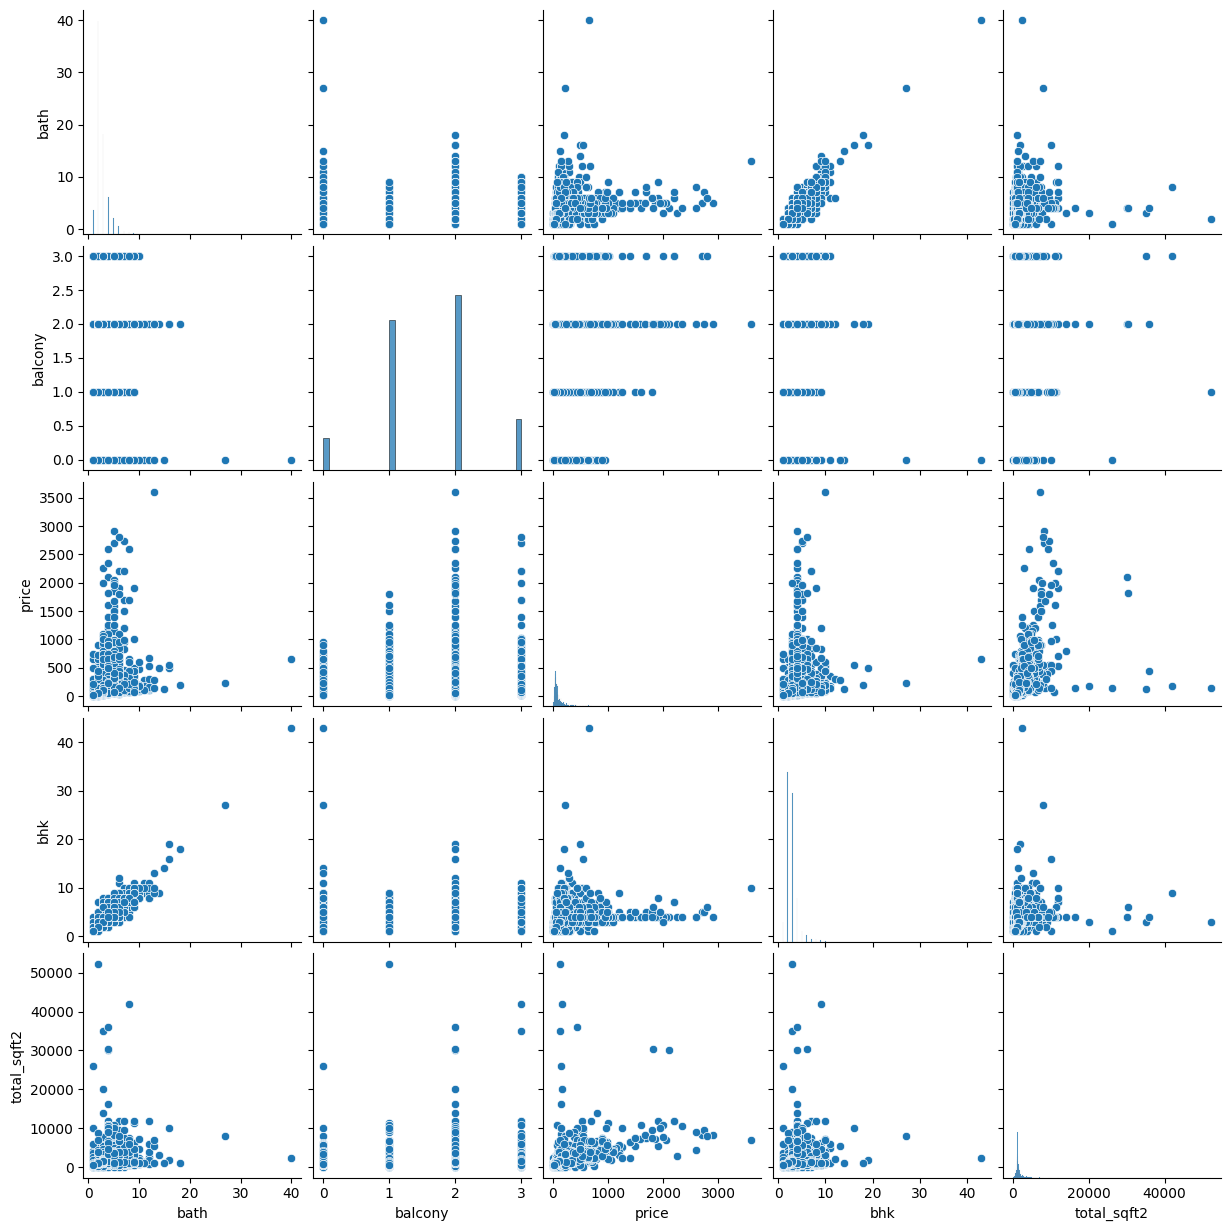

In [ ]:
sns.pairplot(df)

<Axes: >

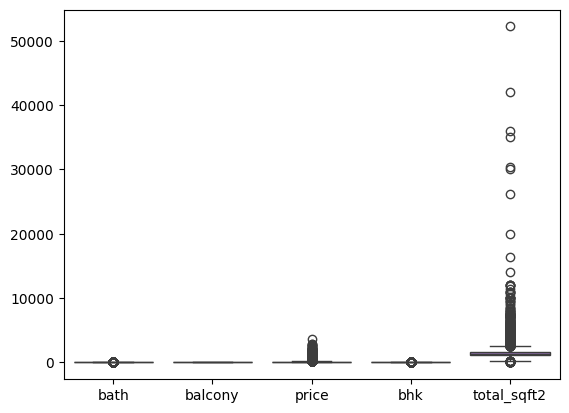

In [ ]:
sns.boxplot(df)

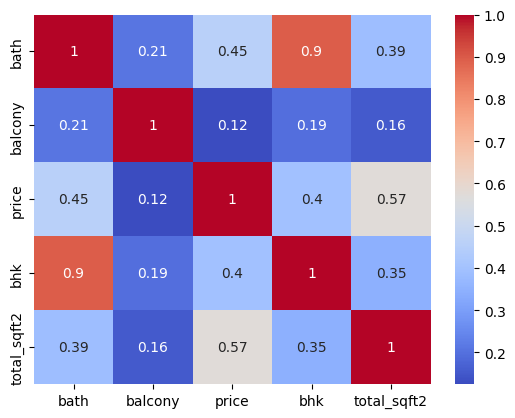

In [ ]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=[float, int])

# Compute the correlation matrix and plot the heatmap
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.show()


### 1.3.1 From the heatmap it is clear that the numerical columns are positively corelated.Value of correlation indicates that the total sqft effect the house price well.Similarly bhk and bathroom having a great correlation

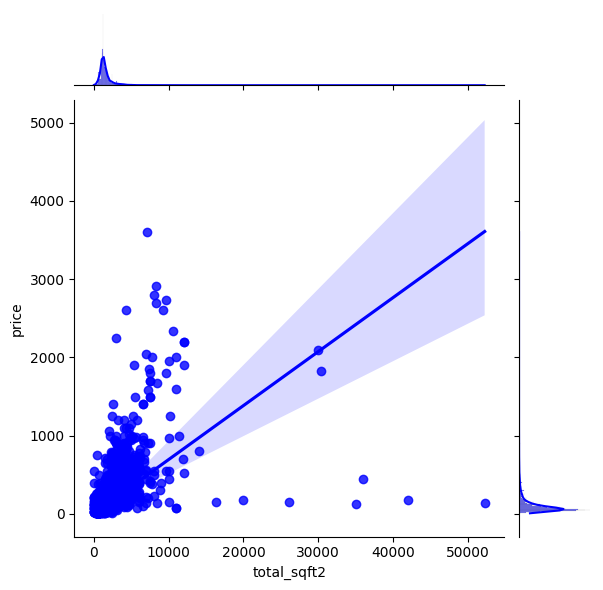

In [ ]:
sns.jointplot(x='total_sqft2',y='price',data=df,kind='reg',color='blue')

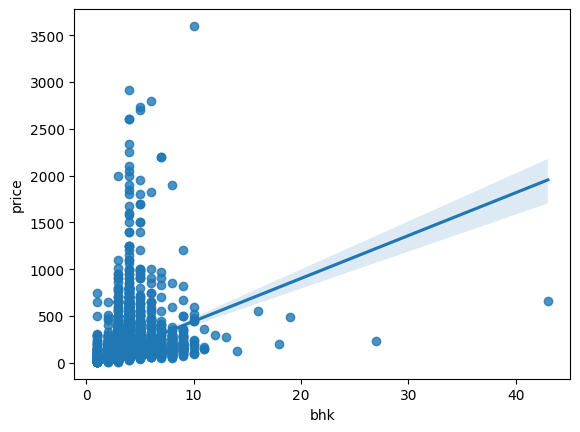

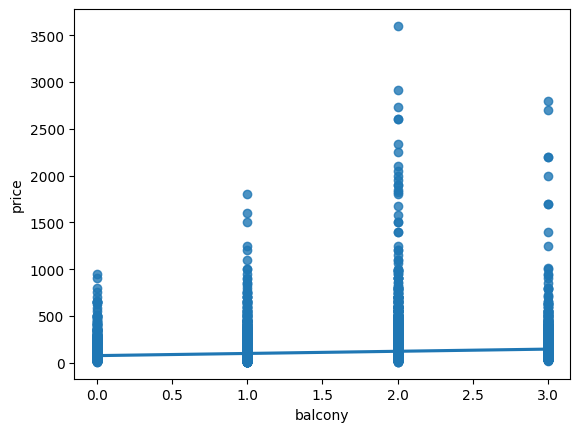

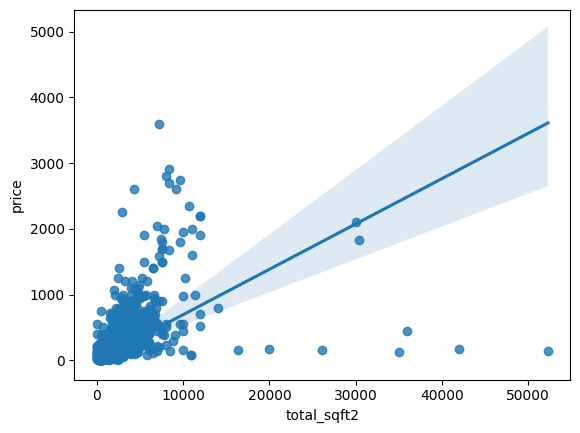

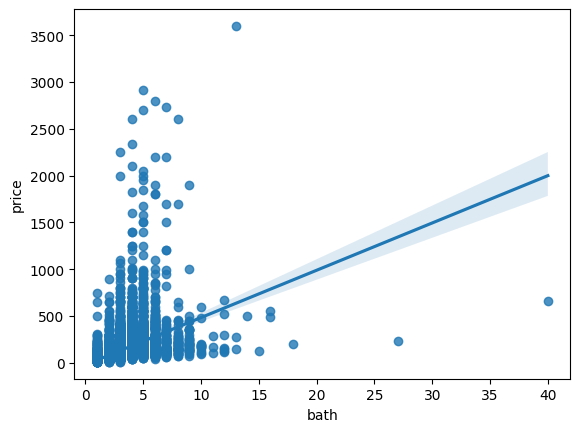

In [ ]:
lst1=['bhk','balcony','total_sqft2','bath']
for i in lst1:
  sns.regplot(x=df[i],y=df['price'])
  plt.show()

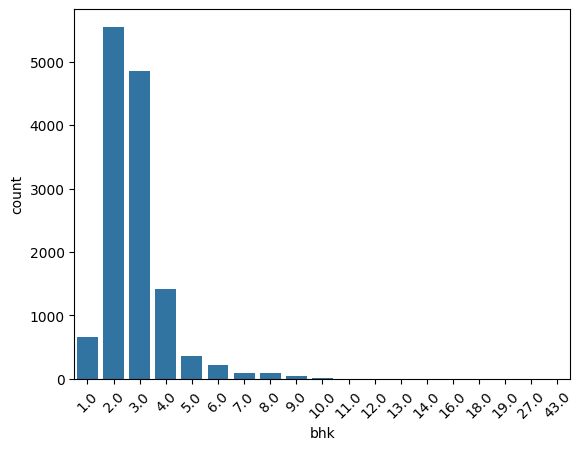

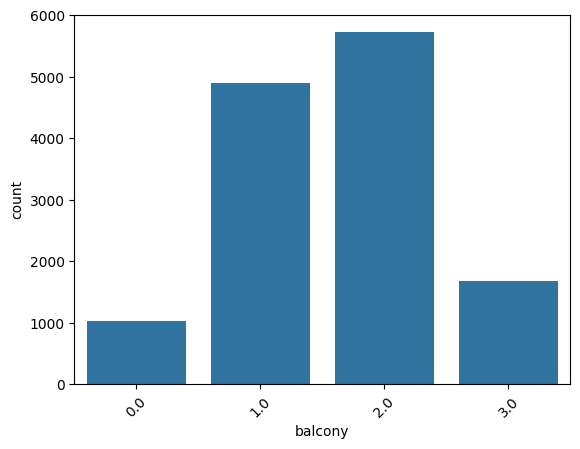

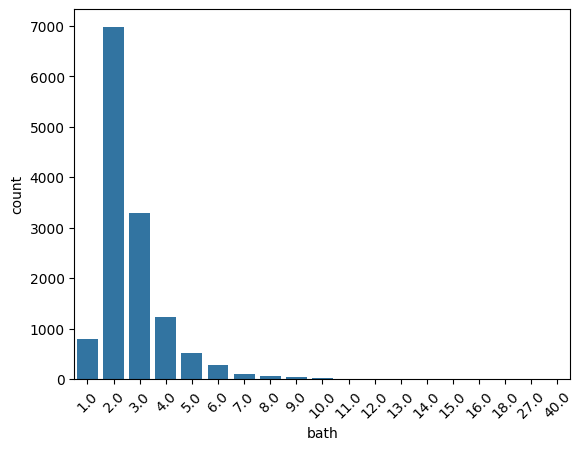

In [ ]:
lst=['bhk','balcony','bath']
for i in lst:
  sns.countplot(x=df[i],data=df)
  plt.xticks(rotation=45)
  plt.show()

(-1.099998030117775,
 1.099997651150479,
 -1.0999978873219602,
 1.0999992113546895)

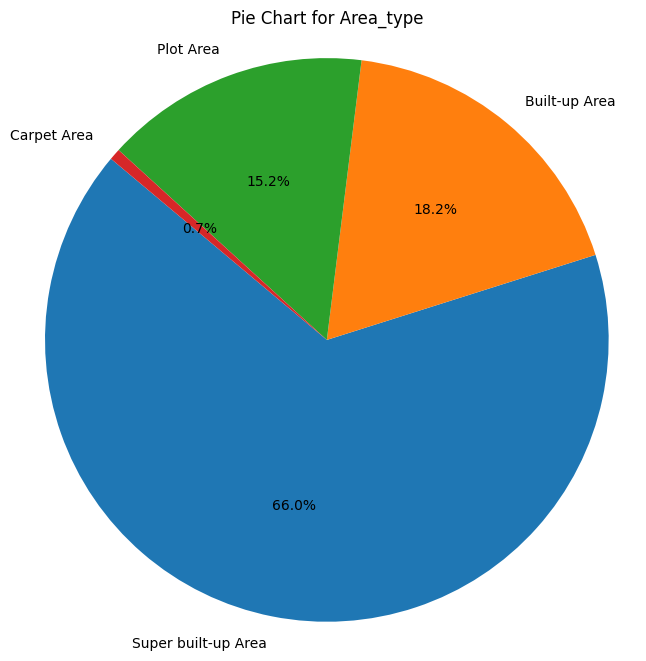

In [ ]:
labels=['Super built-up Area','Built-up Area','Plot Area','Carpet Area']
#sizes=[30,45,25] #values for each category

#create a pie chart
plt.figure(figsize=(8,8))   #set the fig size
plt.pie(df['area_type'].value_counts(),labels=labels,autopct='%1.1f%%',startangle=140)
plt.title('Pie Chart for Area_type')
plt.axis('equal')

<Axes: xlabel='area_type', ylabel='price'>

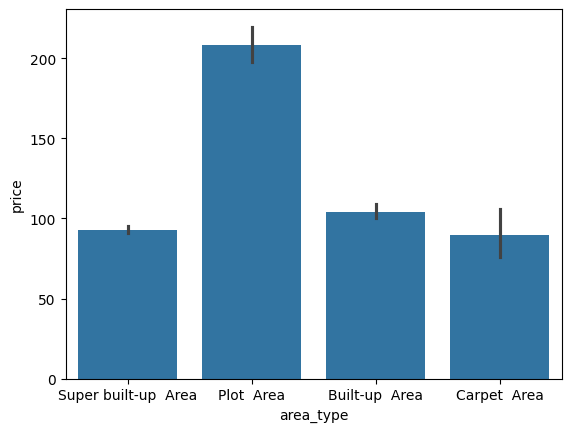

In [ ]:
sns.barplot(x=df['area_type'],y=df['price'])

### 1.3.2 Before removing outliers

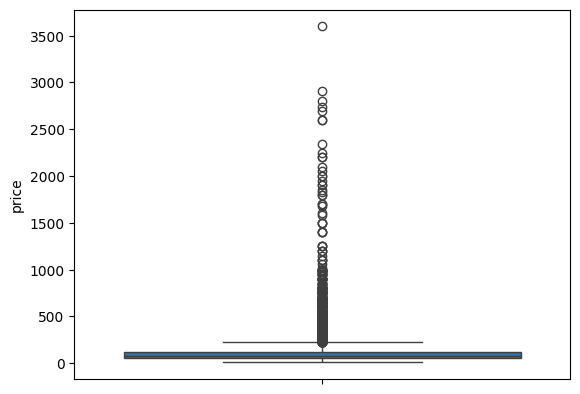

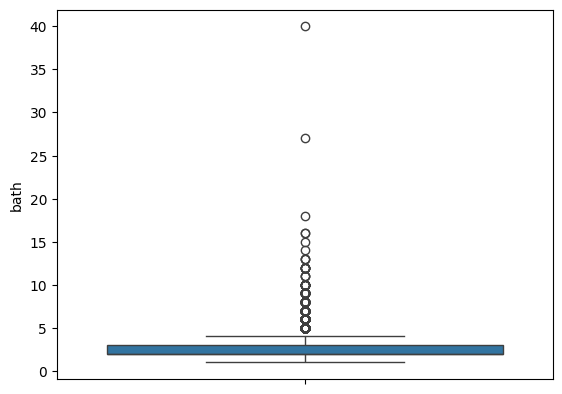

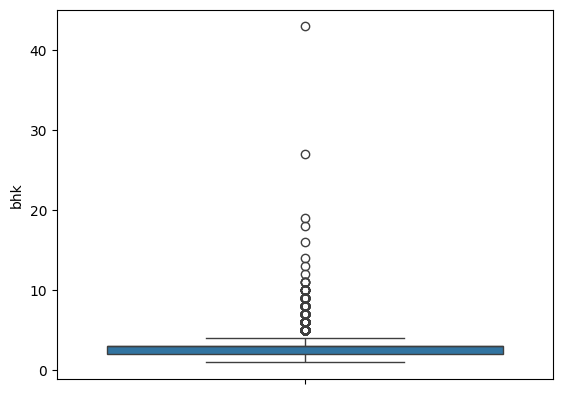

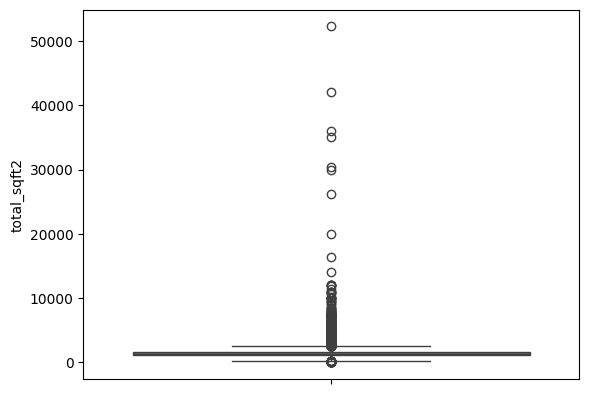

In [ ]:
lst2=['price','bath','bhk','total_sqft2']
for i in lst2:
  sns.boxplot(df[i])
  plt.show()

In [ ]:
def count_outliers(column):
  Q1=column.quantile(0.25)
  Q3=column.quantile(0.75)
  IQR=Q3-Q1
  lower_threshold=Q1-1.5*IQR
  upper_threshold=Q3+1.5*IQR
  outliers=column[(column<lower_threshold)|(column>upper_threshold)]
  return outliers

#create a dictionary to store outliers counts for each numerical column
outlier_counts={}


#Iterate through numerical columns and count outliers
numerical_columns=df.select_dtypes(include=['number']).columns
for column in numerical_columns:
  outlier_counts[column]=count_outliers(df[column])

#display the counts of outliers for each numerical column
print(outlier_counts)

{'bath': 1        5.0
9        6.0
11       5.0
22       5.0
45       9.0
        ... 
13300    6.0
13303    5.0
13306    5.0
13311    9.0
13316    5.0
Name: bath, Length: 1039, dtype: float64, 'balcony': Series([], Name: balcony, dtype: float64), 'price': 7        600.0
9        370.0
11       295.0
18       290.0
22       380.0
         ...  
13306    325.0
13311    250.0
13315    231.0
13316    400.0
13318    488.0
Name: price, Length: 1276, dtype: float64, 'bhk': 9        6.0
45       8.0
58       6.0
64       8.0
68       8.0
        ... 
13281    5.0
13300    5.0
13303    5.0
13311    7.0
13315    5.0
Name: bhk, Length: 846, dtype: float64, 'total_sqft2': 1        2600.0
6        2732.0
7        3300.0
11       2785.0
18       2770.0
          ...  
13290    4050.0
13299    2856.0
13315    3453.0
13316    3600.0
13318    4689.0
Name: total_sqft2, Length: 1205, dtype: float64}


In [ ]:
for i in lst2:
  def drop_outliers(df,field_name):
    iqr=1.5*(np.percentile(df[field_name],75)-np.percentile(df[field_name],25))
    df.drop(df[df[field_name]>(iqr+np.percentile(df[field_name],75))].index,inplace=True)
    df.drop(df[df[field_name]<(np.percentile(df[field_name],25)-iqr)].index,inplace=True)
    drop_outliers(df,i)

### 1.3.3 After outliers removal

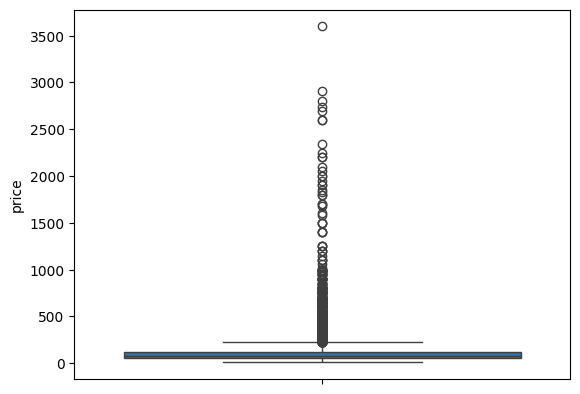

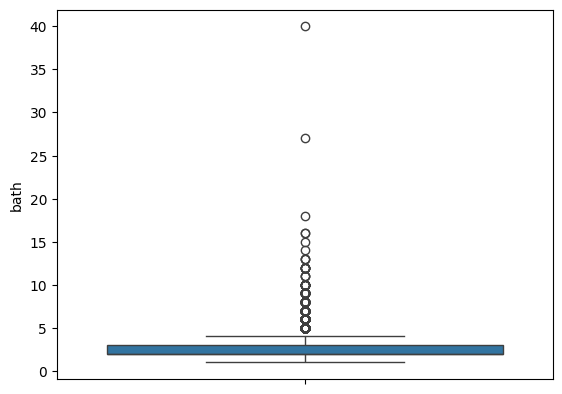

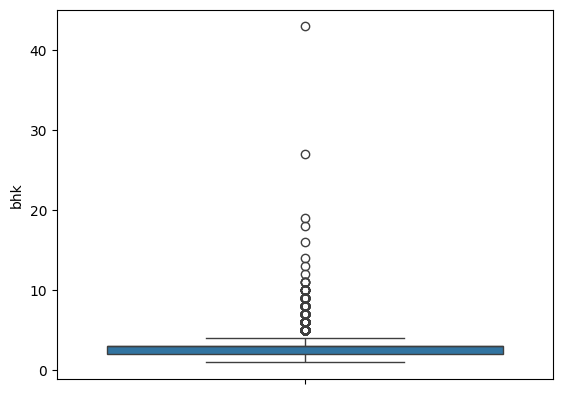

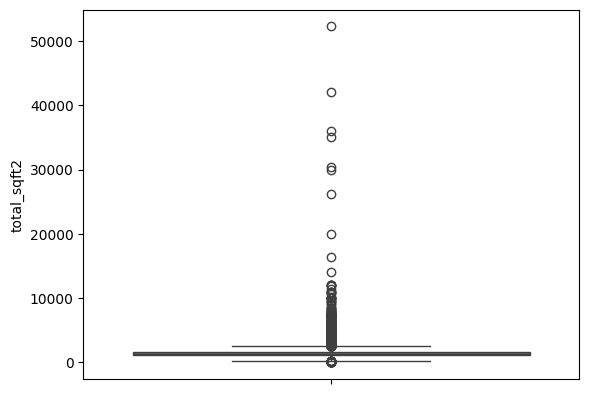

In [ ]:
for i in lst2:
  sns.boxplot(df[i])
  plt.show()

### 1.4 ENCODING

In [ ]:
dfa=pd.get_dummies(df[['location','area_type']],drop_first=True)
dfa

,location_1st Block Jayanagar,location_1st Phase JP Nagar,location_2nd Phase Judicial Layout,location_2nd Stage Nagarbhavi,location_5th Block Hbr Layout,location_5th Phase JP Nagar,location_6th Phase JP Nagar,location_7th Phase JP Nagar,location_8th Phase JP Nagar,location_9th Phase JP Nagar,...,location_Whitefield,location_Yelachenahalli,location_Yelahanka,location_Yelahanka New Town,location_Yelenahalli,location_Yeshwanthpur,location_other,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13315,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
13316,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,True
13317,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
13318,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [ ]:
dfb=pd.concat([df,dfa],axis=1)
dfb

,area_type,location,bath,balcony,price,bhk,total_sqft2,location_1st Block Jayanagar,location_1st Phase JP Nagar,location_2nd Phase Judicial Layout,...,location_Whitefield,location_Yelachenahalli,location_Yelahanka,location_Yelahanka New Town,location_Yelenahalli,location_Yeshwanthpur,location_other,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area
0,Super built-up Area,Electronic City Phase II,2.0,1.0,39.07,2.0,1056.0,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,Plot Area,Chikka Tirupathi,5.0,3.0,120.00,4.0,2600.0,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,Built-up Area,Uttarahalli,2.0,3.0,62.00,3.0,1440.0,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Super built-up Area,Lingadheeranahalli,3.0,1.0,95.00,3.0,1521.0,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,Super built-up Area,Kothanur,2.0,1.0,51.00,2.0,1200.0,False,False,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Whitefield,4.0,0.0,231.00,5.0,3453.0,False,False,False,...,True,False,False,False,False,False,False,False,False,False
13316,Super built-up Area,other,5.0,2.0,400.00,4.0,3600.0,False,False,False,...,False,False,False,False,False,False,True,False,False,True
13317,Built-up Area,Raja Rajeshwari Nagar,2.0,1.0,60.00,2.0,1141.0,False,False,False,...,False,False,False,False,False,False,False,False,False,False
13318,Super built-up Area,Padmanabhanagar,4.0,1.0,488.00,4.0,4689.0,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [ ]:
dfb.dtypes

,0
area_type,object
location,object
bath,float64
balcony,float64
price,float64
...,...
location_Yeshwanthpur,bool
location_other,bool
area_type_Carpet Area,bool
area_type_Plot Area,bool


In [ ]:
dfb=dfb.drop(['area_type','location'],axis=1)
dfb

,bath,balcony,price,bhk,total_sqft2,location_1st Block Jayanagar,location_1st Phase JP Nagar,location_2nd Phase Judicial Layout,location_2nd Stage Nagarbhavi,location_5th Block Hbr Layout,...,location_Whitefield,location_Yelachenahalli,location_Yelahanka,location_Yelahanka New Town,location_Yelenahalli,location_Yeshwanthpur,location_other,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area
0,2.0,1.0,39.07,2.0,1056.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,5.0,3.0,120.00,4.0,2600.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,2.0,3.0,62.00,3.0,1440.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,3.0,1.0,95.00,3.0,1521.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,2.0,1.0,51.00,2.0,1200.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13315,4.0,0.0,231.00,5.0,3453.0,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
13316,5.0,2.0,400.00,4.0,3600.0,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,True
13317,2.0,1.0,60.00,2.0,1141.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
13318,4.0,1.0,488.00,4.0,4689.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [ ]:
y=dfb['price'].values
x=dfb.drop(['price'],axis=1).values

### 1.5 FEATURE SELECTION

In [ ]:
from sklearn.feature_selection import SelectKBest,f_regression
k_best=SelectKBest(score_func=f_regression,k=200)
y=dfb['price'].astype(int)
x=dfb.drop(['price'],axis=1)
x_new=k_best.fit_transform(x,y)
selected_features_indices=k_best.get_support(indices=True)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_new,y,test_size=0.30,random_state=42)

### 1.6 LINEAR REGRESSION

In [ ]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
y_pred

array([-16.50490442, 109.27196199,  90.15558293, ..., 231.51835774,
        56.56477364,  58.09095717])

In [ ]:
dfc=pd.DataFrame({'Actual_value':y_test,'Predicted_value':y_pred,'error':y_test-y_pred})
dfc

,Actual_value,Predicted_value,error
8077,64,-16.504904,80.504904
1602,125,109.271962,15.728038
10498,60,90.155583,-30.155583
3297,110,153.604870,-43.604870
8893,210,131.316266,78.683734
...,...,...,...
4337,45,74.110060,-29.110060
349,74,117.362527,-43.362527
12892,235,231.518358,3.481642
4641,41,56.564774,-15.564774


In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
print('MAPE:',mean_absolute_percentage_error(y_test,y_pred))

MAPE: 0.42069463732321655


In [ ]:
from sklearn.metrics import r2_score
print('R2 score:',r2_score(y_test,y_pred))

R2 score: 0.5270333978040743


### 1.7 DECISION TREE

In [ ]:
from sklearn.tree import DecisionTreeRegressor
decision=DecisionTreeRegressor()

### 1.7.1 HYPERPARAMETER TUNING

In [ ]:
decision.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [ ]:
from sklearn.model_selection import GridSearchCV
parameter={'criterion':['poisson'],'min_samples_split':[5],'min_impurity_decrease':[0,1],'splitter':['best']}
gsv=GridSearchCV(decision,parameter,cv=10,scoring='accuracy')
gsv.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['poisson'],
                         'min_impurity_decrease': [0, 1],
                         'min_samples_split': [5], 'splitter': ['best']},
             scoring='accuracy')

In [ ]:
gsv.best_params_

{'criterion': 'poisson',
 'min_impurity_decrease': 0,
 'min_samples_split': 5,
 'splitter': 'best'}

In [ ]:
decision1=DecisionTreeRegressor(criterion='poisson',min_impurity_decrease=0.6,min_samples_split=5)
decision1.fit(x_train,y_train)
y_pred1=decision1.predict(x_test)
y_pred1

array([ 48.68192371, 117.24495042,  48.68192371, ..., 117.24495042,
        75.57745267,  48.68192371])

In [ ]:
print('r2_score:',r2_score(y_test,y_pred1))
print('MAPE :',mean_absolute_percentage_error(y_test,y_pred1))

r2_score: 0.5001680750932157
MAPE : 0.4134787890304237


### 1.8 RANDOM FOREST

In [ ]:
from sklearn.ensemble import RandomForestRegressor
random=RandomForestRegressor()
random.fit(x_train,y_train)
y_pred2=random.predict(x_test)
y_pred2

array([ 61.39607143,  99.454     ,  66.18058478, ..., 126.085     ,
        54.10333333,  58.62      ])

In [ ]:
print('r2_score:',r2_score(y_test,y_pred2))
print('MAPE :',mean_absolute_percentage_error(y_test,y_pred2))

r2_score: 0.6177204887228016
MAPE : 0.2791351359482008


### 1.9 LASSO REGRESSION

In [ ]:
from sklearn.linear_model import Lasso
reg=Lasso(alpha=0.1)
reg.fit(x_train,y_train)
y_pred3=reg.predict(x_test)
y_pred3

array([ 52.5310783 , 107.17181804,  80.35069032, ..., 234.22722514,
        58.49589986,  56.31634964])

In [ ]:
print('r2_score:',r2_score(y_test,y_pred3))
print('MAPE :',mean_absolute_percentage_error(y_test,y_pred3))

r2_score: 0.5201537502985858
MAPE : 0.41051884117975934


### 1.10 XGBOOST

In [ ]:
import xgboost as xgb
xg_reg=xgb.XGBRegressor(n_estimators=100,max_depth=3)
xg_reg.fit(x_train,y_train)
y_pred4=xg_reg.predict(x_test)
y_pred4

array([ 37.608326, 101.26376 ,  57.729946, ..., 168.4787  ,  64.92149 ,
        47.84529 ], dtype=float32)

In [ ]:
print('r2_score:',r2_score(y_test,y_pred4))
print('MAPE :',mean_absolute_percentage_error(y_test,y_pred4))

r2_score: 0.6694371990999022
MAPE : 0.3092571278185832


<BarContainer object of 5 artists>

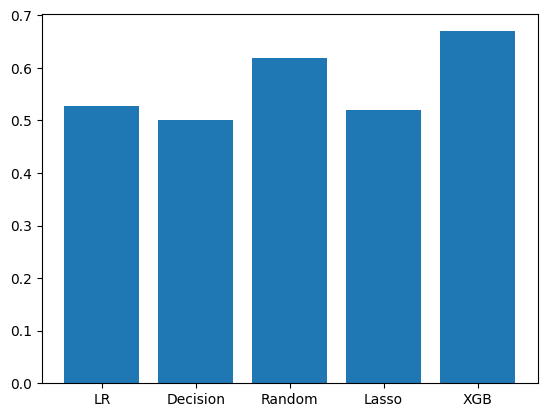

In [ ]:
r1=r2_score(y_test,y_pred)
r2=r2_score(y_test,y_pred1)
r3=r2_score(y_test,y_pred2)
r4=r2_score(y_test,y_pred3)
r5=r2_score(y_test,y_pred4)
r6=['LR','Decision','Random','Lasso','XGB']
result=[r1,r2,r3,r4,r5]
plt.bar(r6,result)

### 2 CONCLUSION



*   Random forest and xgboost model show higher accuracy compared to other models
*   Linear regression also gives better accuracy
*   Decision tree model is having lower accuracy
*   The house price model demostrated its ability to provide accurate and reliable estimates for property values






